In [ ]:
단어의 표현 방법
#1) local representation  :출현 빈도에 따라 인덱스 부여 -> 분류 문제나 유사도 
#2) continuous representation :주변단어를 참고하여 인덱스 부여

#TF-IDF : 불용어 또는 중요한 단어에 가중치를 줌. 
#--------Term Frequency-Inverse Document Frequency
#--------Tf(d,t) 문서(d) 안에 단어(t)가 나온 개수 
#--------Df(t) 단어(t)가 나온 문서(d)의 개수
#--------IDf(d,t) = ln(n/(1+Df)) : Df의 역수, n은 문서의 개수 
#--------결국, Tf*IDf 값이 낮으면 중요도 낮음(불용어), 값이 높으면 중요도 높음(특정 단어).

In [30]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
import nltk  
nltk.download('punkt')
from nltk.tokenize import word_tokenize  
import re

#import nltk 안되면 
#pip uninstall nltk
#pip install -U nltk

[nltk_data] Downloading package punkt to /Users/apple1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
#크롤링한 엑셀 파일 불러오기
import xlrd

loc=("/Users/apple1/youtube_caps/xy.xlsx")

wb=xlrd.open_workbook(loc)
sheet1=wb.sheet_by_index(0)

#표기가 다른 단어들의 통합 ex) US=USA
#대소문자 통합 : 문장 첫 단어만 소문자로 바꾸기 
#불용어, 등장 빈도가 적은 단어, 이모티콘 지우기

#불용어 제거를 위한 모듈
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

#이모티콘 제거를 위한 모듈
emoji_pattern = re.compile("["
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
    "]+", flags=re.UNICODE)
#comment_list = []
#for i in range(len(comment_data)):
#    comment_list.append(comment_data['comment'].iloc[i])



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/apple1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
X=[]

#row i and column 1 -> 댓글들만 가져오기 
for i in range(sheet1.nrows):
    line=sheet1.cell_value(i,2)
    line=str(line)
    line=line.lower()
    #don't erase [?,:,"]
    line=re.sub('[-=+,#/\^$.@*\※~&%ㆍ!’』\\‘|\(\)\[\]\<\>`“\'…》;]','',line)
    line=re.sub(emoji_pattern,'',line)
    line2=tokenizer.tokenize(line) 
    X.append(line2)
    
print(X)



[['i', 'absolutely', 'loved', 'it'], ['i', 'need', 'some', 'help', 'in', 'ending', 'a', 'discussion', 'for', 'the', 'people', 'who', 'have', 'viewed', 'the', 'moviewould', 'you', 'say', 'this', 'movie', 'is', 'more', 'on', 'the', 'horror', 'side', 'of', 'things', 'or', 'the', 'suspenseful', 'side', 'of', 'things'], ['nice', 'rant', 'jermey', 'your', 'totally', 'right'], ['if', 'i', 'only', 'had', 'to', 'say', 'any', 'critic', 'to', 'a', 'critic', 'is', 'sometimes', 'dont', 'compare', 'with', 'the', 'original', 'could', 'be', 'a', 'new', 'point', 'of', 'view', 'but', 'i', 'love', 'your', 'reviews', 'bc', 'you', 'are', 'so', 'good', 'explaining', 'and', 'i', 'always', 'recommend', 'you'], ['another', 'thing', 'i', 'noticed', 'about', 'will', 'smiths', 'genie', 'is', 'that', 'it', 'sorta', 'reminds', 'me', 'of', 'the', 'character', 'he', 'previously', 'played', 'hitch', 'even', 'the', 'encore', 'scene', 'at', 'the', 'end', 'was', 'reminiscent', 'of', 'the', 'ending', 'scene', 'in', 'hitch

In [33]:
# 어간추출(stemming) - 품사의 정보가 보존되지 않음.  
# vs 표제어 추출(lemmatization) - 품사의 정보가 보존됨.
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
n=WordNetLemmatizer()

x_data=[]

for l in X:
    result=[]
    for w in l:
        #표제어 추출
        n.lemmatize(w) 
        #불용어 제거
        if w not in stop_words:
            result.append(w)
            
    x_data.append(result)

  

[nltk_data] Downloading package wordnet to /Users/apple1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
print(x_data)


[['absolutely', 'loved'], ['need', 'help', 'ending', 'discussion', 'people', 'viewed', 'moviewould', 'say', 'movie', 'horror', 'side', 'things', 'suspenseful', 'side', 'things'], ['nice', 'rant', 'jermey', 'totally', 'right'], ['say', 'critic', 'critic', 'sometimes', 'dont', 'compare', 'original', 'could', 'new', 'point', 'view', 'love', 'reviews', 'bc', 'good', 'explaining', 'always', 'recommend'], ['another', 'thing', 'noticed', 'smiths', 'genie', 'sorta', 'reminds', 'character', 'previously', 'played', 'hitch', 'even', 'encore', 'scene', 'end', 'reminiscent', 'ending', 'scene', 'hitch', 'liked', 'actually'], ['bruh', 'wheres', 'cheddar', 'thats', 'burger', 'staple'], ['literally', 'jamie', 'child', 'version', 'eugene', 'straight'], ['would', 'somebody', 'like', 'brutal', 'kills', '?', '?', '?', '?', 'talk', 'psychopath'], ['feel', 'like', 'test', 'work', 'nachos', 'pizza', 'idk'], ['go', 'screen', 'junkies', 'movie', 'fights'], ['knew', 'toni', 'colette', 'bomb', 'drop', '?', '?'], 

In [34]:
x2_data=[]

for i in range(len(x_data)):
    line_f=' '.join(x_data[i])
    x2_data.append(line_f)

In [7]:
print(x2_data)

['absolutely loved', 'need help ending discussion people viewed moviewould say movie horror side things suspenseful side things', 'nice rant jermey totally right', 'say critic critic sometimes dont compare original could new point view love reviews bc good explaining always recommend', 'another thing noticed smiths genie sorta reminds character previously played hitch even encore scene end reminiscent ending scene hitch liked actually', 'bruh wheres cheddar thats burger staple', 'literally jamie child version eugene straight', 'would somebody like brutal kills ? ? ? ? talk psychopath', 'feel like test work nachos pizza idk', 'go screen junkies movie fights', 'knew toni colette bomb drop ? ?', 'every year youtube keeps getting disconnected content creators', 'normal get sleepy horror movie ?', 'wtf buy blu ray ? teh mad max ? jk love jeremy forever', 'freaking love endings', 'oreo os ranking ? ? ?', 'issue people cant realize giving rating 2 completely different movies mean movies equal

In [35]:
#label 불러오기 
Y=[]

for i in range(sheet1.nrows):
    label=sheet1.cell_value(i,1)
    Y.append(label)

print(Y)

[3.0, 1.0, 3.0, 4.0, 4.0, 2.0, 0.0, 2.0, 0.0, 0.0, 4.0, 1.0, 2.0, 3.0, 3.0, 2.0, 1.0, 4.0, 0.0, 0.0, 0.0, 2.0, 4.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 0.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 4.0, 3.0, 0.0, 0.0, 1.0, 1.0, 0.0, 4.0, 1.0, 4.0, 3.0, 1.0, 2.0, 1.0, 1.0, 0.0, 1.0, 4.0, 0.0, 3.0, 3.0, 3.0, 0.0, 3.0, 0.0, 2.0, 3.0, 4.0, 2.0, 1.0, 4.0, 3.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 4.0, 2.0, 4.0, 2.0, 1.0, 3.0, 0.0, 1.0, 1.0, 1.0, 2.0, 3.0, 4.0, 1.0, 3.0, 1.0, 4.0, 2.0, 4.0, 0.0, 0.0, 3.0, 3.0, 3.0, 4.0, 1.0, 1.0, 1.0, 0.0, 3.0, 0.0, 0.0, 3.0, 2.0, 0.0, 4.0, 4.0, 4.0, 0.0, 2.0, 1.0, 1.0, 3.0, 2.0, 4.0, 0.0, 4.0, 2.0, 0.0, 2.0, 4.0, 1.0, 1.0, 4.0, 4.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 4.0, 2.0, 4.0, 0.0, 1.0, 3.0, 0.0, 1.0, 1.0, 3.0, 0.0, 0.0, 0.0, 2.0, 4.0, 0.0, 0.0, 4.0, 1.0, 3.0, 3.0, 1.0, 0.0, 2.0, 1.0, 0.0, 4.0, 1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 0.0, 0.0, 3.0, 2.0, 3.0, 1.0, 0.0, 4.0, 0.0, 0.0, 1.0, 4.0, 2.0, 2.0, 0.0, 0.0, 3.0, 0.0, 4.0, 2.0, 2.0,

In [36]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical


In [37]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, LSTM, Embedding,SpatialDropout1D
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.constraints import unit_norm

In [38]:
#x2_data: comments
#Y: label

num_classes=5
MAX_WORDS=6000
MAX_LEN=50
EMBEDDING_DIM=100

In [39]:
t=Tokenizer(num_words=MAX_WORDS)
t.fit_on_texts(x2_data)
x=t.texts_to_sequences(x2_data)

#X_train, X_test = prepare_data(x2_data,y2_data,'tfidf')
#x=t.texts_to_matrix(x2_data, mode='tfidf').round(3)

#Set the max number of words in each complaint at 250.
#건너뛰기..
x2=sequence.pad_sequences(x,maxlen=MAX_LEN)

In [40]:
print(t.word_index)

{'movie': 1, 'like': 2, 'review': 3, 'good': 4, 'im': 5, 'love': 6, 'one': 7, 'get': 8, 'video': 9, 'really': 10, 'dont': 11, 'people': 12, 'think': 13, 'see': 14, 'film': 15, 'great': 16, 'know': 17, 'would': 18, 'rewind': 19, 'watch': 20, "''": 21, 'please': 22, 'movies': 23, '2019': 24, 'best': 25, 'youtube': 26, 'time': 27, 'didnt': 28, 'make': 29, 'much': 30, 'us': 31, 'got': 32, 'even': 33, 'rating': 34, 'horror': 35, 'loved': 36, 'want': 37, 'jeremy': 38, 'bad': 39, 'makeup': 40, 'thought': 41, 'way': 42, 'say': 43, 'better': 44, 'watching': 45, 'actually': 46, 'made': 47, 'wrong': 48, 'well': 49, 'thats': 50, 'cant': 51, 'still': 52, 'need': 53, 'iphone': 54, 'also': 55, 'ive': 56, 'ever': 57, 'never': 58, 'lol': 59, 'watched': 60, 'could': 61, '11': 62, 'man': 63, 'reviews': 64, 'feel': 65, 'rant': 66, 'going': 67, 'seen': 68, 'end': 69, 'saw': 70, 'u': 71, 'give': 72, 'aladdin': 73, 'keep': 74, 'chris': 75, 'always': 76, 'first': 77, 'cheese': 78, 'go': 79, '”': 80, 'thing': 

In [41]:
# 훈련용 레이블의 원-핫 인코딩
y = np_utils.to_categorical(Y) 

In [15]:
print(x_data[200],X[200],y[200])

['jeremys', 'becoming', 'edgy', 'call', 'parents', 'calms'] ['jeremys', 'becoming', 'edgy', 'now', 'will', 'have', 'to', 'call', 'his', 'parents', 'after', 'he', 'calms', 'down'] [0. 1. 0. 0. 0.]


In [16]:
print(len(x2))

4520


In [48]:
#cross validation

from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.svm import SVR


n_split=4
scores=[]
best_svr=SVR(kernel='rbf')

model = Sequential()
model.add(Embedding(MAX_WORDS,EMBEDDING_DIM,input_length=x2.shape[1]))   
model.add(SpatialDropout1D(0.2))
#model.add(BatchNormalizaion())
model.add(LSTM(100,dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(num_classes, activation='softmax'))    
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
    
    
for train_index, test_index in KFold(n_split,random_state=43,shuffle=False).split(x2):
    x_tr,x_te=x2[train_index],x2[test_index]
    y_tr,y_te=y[train_index],y[test_index]
    #print("Train:",x_tr,y_tr,len(x_tr))
    #print("Test:",x_te.shape,y_te.shape,len(x_te))
    
    #best_svr.fit(x_tr,y_tr)

    history = model.fit(x=x_tr, y=y_tr,epochs=100,validation_split=0.2)
    print("\n 테스트 정확도: %.4f" % (model.evaluate(x_te, y_te)[1]))
    #scores.append(best_svr.score(x_te,y_te))
    
#r2_score=np.mean(scores)



Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 50, 100)           600000    
_________________________________________________________________
spatial_dropout1d_15 (Spatia (None, 50, 100)           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 505       
Total params: 680,905
Trainable params: 680,905
Non-trainable params: 0
_________________________________________________________________
None
Train on 2712 samples, validate on 678 samples
Epoch 1/100
2712/2712 [==============================] - 7s 2ms/step - loss: 1.5860 - accuracy: 0.2504 - val_loss: 1.5303 - val_accuracy: 0.3437
Epoch 2/100
2712/2712 [=========================

Epoch 51/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0134 - accuracy: 0.9945 - val_loss: 4.5907 - val_accuracy: 0.4277
Epoch 52/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0151 - accuracy: 0.9948 - val_loss: 4.5407 - val_accuracy: 0.4277
Epoch 53/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0151 - accuracy: 0.9963 - val_loss: 4.6632 - val_accuracy: 0.4204
Epoch 54/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0141 - accuracy: 0.9952 - val_loss: 4.6103 - val_accuracy: 0.4115
Epoch 55/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0144 - accuracy: 0.9948 - val_loss: 4.6453 - val_accuracy: 0.4218
Epoch 56/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0105 - accuracy: 0.9963 - val_loss: 4.7278 - val_accuracy: 0.4307
Epoch 57/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0215 - accuracy: 0.9919 - val_loss: 4.4836 -

2712/2712 [==============================] - 5s 2ms/step - loss: 0.1127 - accuracy: 0.9657 - val_loss: 2.8974 - val_accuracy: 0.4484
Epoch 7/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0838 - accuracy: 0.9742 - val_loss: 3.0324 - val_accuracy: 0.4543
Epoch 8/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0754 - accuracy: 0.9764 - val_loss: 3.1111 - val_accuracy: 0.4499
Epoch 9/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0583 - accuracy: 0.9830 - val_loss: 3.2807 - val_accuracy: 0.4528
Epoch 10/100
2712/2712 [==============================] - 7s 2ms/step - loss: 0.0465 - accuracy: 0.9860 - val_loss: 3.3915 - val_accuracy: 0.4617
Epoch 11/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0412 - accuracy: 0.9900 - val_loss: 3.4753 - val_accuracy: 0.4646
Epoch 12/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0387 - accuracy: 0.9889 - val_loss: 3.5820 - val_accuracy: 0

2712/2712 [==============================] - 5s 2ms/step - loss: 0.0105 - accuracy: 0.9945 - val_loss: 4.7723 - val_accuracy: 0.4543
Epoch 63/100
2712/2712 [==============================] - 5s 2ms/step - loss: 0.0100 - accuracy: 0.9956 - val_loss: 4.7109 - val_accuracy: 0.4572
Epoch 64/100
2712/2712 [==============================] - 5s 2ms/step - loss: 0.0089 - accuracy: 0.9963 - val_loss: 4.7231 - val_accuracy: 0.4440
Epoch 65/100
2712/2712 [==============================] - 5s 2ms/step - loss: 0.0101 - accuracy: 0.9945 - val_loss: 4.7581 - val_accuracy: 0.4454
Epoch 66/100
2712/2712 [==============================] - 5s 2ms/step - loss: 0.0080 - accuracy: 0.9959 - val_loss: 4.7810 - val_accuracy: 0.4513
Epoch 67/100
2712/2712 [==============================] - 5s 2ms/step - loss: 0.0082 - accuracy: 0.9967 - val_loss: 4.8400 - val_accuracy: 0.4499
Epoch 68/100
2712/2712 [==============================] - 5s 2ms/step - loss: 0.0091 - accuracy: 0.9963 - val_loss: 4.8409 - val_accuracy

2712/2712 [==============================] - 5s 2ms/step - loss: 0.0067 - accuracy: 0.9978 - val_loss: 4.2955 - val_accuracy: 0.4572
Epoch 18/100
2712/2712 [==============================] - 5s 2ms/step - loss: 0.0051 - accuracy: 0.9982 - val_loss: 4.3682 - val_accuracy: 0.4528
Epoch 19/100
2712/2712 [==============================] - 5s 2ms/step - loss: 0.0046 - accuracy: 0.9978 - val_loss: 4.4138 - val_accuracy: 0.4587
Epoch 20/100
2712/2712 [==============================] - 5s 2ms/step - loss: 0.0039 - accuracy: 0.9989 - val_loss: 4.4624 - val_accuracy: 0.4558
Epoch 21/100
2712/2712 [==============================] - 5s 2ms/step - loss: 0.0060 - accuracy: 0.9978 - val_loss: 4.5144 - val_accuracy: 0.4513
Epoch 22/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0062 - accuracy: 0.9967 - val_loss: 4.4432 - val_accuracy: 0.4440
Epoch 23/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0089 - accuracy: 0.9959 - val_loss: 4.3877 - val_accuracy

2712/2712 [==============================] - 6s 2ms/step - loss: 0.0033 - accuracy: 0.9974 - val_loss: 5.2510 - val_accuracy: 0.4484
Epoch 74/100
2712/2712 [==============================] - 5s 2ms/step - loss: 0.0028 - accuracy: 0.9974 - val_loss: 5.2307 - val_accuracy: 0.4469
Epoch 75/100
2712/2712 [==============================] - 5s 2ms/step - loss: 0.0030 - accuracy: 0.9985 - val_loss: 5.2374 - val_accuracy: 0.4469
Epoch 76/100
2712/2712 [==============================] - 5s 2ms/step - loss: 0.0028 - accuracy: 0.9985 - val_loss: 5.2071 - val_accuracy: 0.4440
Epoch 77/100
2712/2712 [==============================] - 5s 2ms/step - loss: 0.0030 - accuracy: 0.9974 - val_loss: 5.2417 - val_accuracy: 0.4469
Epoch 78/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0030 - accuracy: 0.9974 - val_loss: 5.2515 - val_accuracy: 0.4469
Epoch 79/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0023 - accuracy: 0.9985 - val_loss: 5.2814 - val_accuracy

2712/2712 [==============================] - 5s 2ms/step - loss: 0.0022 - accuracy: 0.9989 - val_loss: 0.5680 - val_accuracy: 0.8864
Epoch 29/100
2712/2712 [==============================] - 5s 2ms/step - loss: 0.0026 - accuracy: 0.9982 - val_loss: 0.5820 - val_accuracy: 0.8805
Epoch 30/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.5877 - val_accuracy: 0.8835
Epoch 31/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0030 - accuracy: 0.9971 - val_loss: 0.5957 - val_accuracy: 0.8805
Epoch 32/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0029 - accuracy: 0.9978 - val_loss: 0.5922 - val_accuracy: 0.8805
Epoch 33/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0025 - accuracy: 0.9989 - val_loss: 0.5943 - val_accuracy: 0.8805
Epoch 34/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0032 - accuracy: 0.9978 - val_loss: 0.6131 - val_accuracy

2712/2712 [==============================] - 6s 2ms/step - loss: 0.0026 - accuracy: 0.9974 - val_loss: 1.0436 - val_accuracy: 0.8319
Epoch 85/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0022 - accuracy: 0.9982 - val_loss: 1.0527 - val_accuracy: 0.8333
Epoch 86/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0028 - accuracy: 0.9978 - val_loss: 1.0452 - val_accuracy: 0.8348
Epoch 87/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0022 - accuracy: 0.9985 - val_loss: 1.0480 - val_accuracy: 0.8392
Epoch 88/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0021 - accuracy: 0.9989 - val_loss: 1.0604 - val_accuracy: 0.8422
Epoch 89/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0024 - accuracy: 0.9982 - val_loss: 1.0706 - val_accuracy: 0.8378
Epoch 90/100
2712/2712 [==============================] - 6s 2ms/step - loss: 0.0024 - accuracy: 0.9982 - val_loss: 1.0700 - val_accuracy

In [47]:
# Necessary imports: 
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

# Make cross validated predictions
predictions = cross_val_predict(model, x2, y, cv=3)
plt.scatter(y, predictions)

TypeError: Cannot clone object '<keras.engine.sequential.Sequential object at 0x1a1ad89eb8>' (type <class 'keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [81]:
import matplotlib.pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

KeyError: 'val_loss'

KeyError: 'acc'

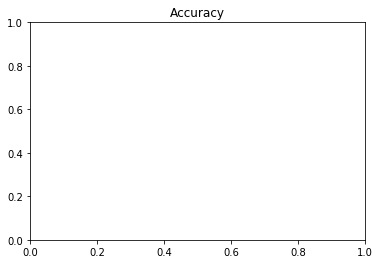

In [82]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();

In [49]:
#save model
model.save("model.h5")

In [ ]:
#kfold
#cross validation-> 평균값 
